<h3>Random Forest Classifier - Respondent 1 </h3>

<h2>Pre-processing</h2>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv'
data = pd.read_csv(file_path)

# Load the second CSV file
new_file_path = '003-91dc3428_emotions_with_cognitive_tesk_and_screen.csv'
new_data = pd.read_csv(new_file_path)

# Merge the two dataframes
data = pd.concat([data, new_data])
# Drop the Timestamp column
data = data.drop('Timestamp', axis=1)

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
print(data.head())
print('Number of rows: ', data.shape[0])

# Select only relevant columns
selected_features = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Confusion', 'Cognitive Task']
data = data[selected_features]

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns

# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
      ])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features)

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


         Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
3705  0.125566  0.136948  0.021518  0.116770  0.041248  0.112264  0.059114   
3706  0.125566  0.137617  0.021531  0.132963  0.040812  0.112249  0.067522   
3707  0.125566  0.137096  0.021582  0.169795  0.040925  0.111568  0.087434   
3708  0.125566  0.136868  0.021714  0.218535  0.041063  0.111219  0.114075   
3709  0.125566  0.137239  0.021806  0.256706  0.040785  0.110944  0.135015   

      Engagement  Valence  Sentimentality  Confusion Cognitive Task Screens  
3705    0.328766      0.0        0.976782   0.036977        Explore     Map  
3706    0.328766      0.0        0.911952   0.034095        Explore     Map  
3707    0.328766      0.0        0.831274   0.026797        Explore     Map  
3708    0.328766      0.0        0.829263   0.019318        Explore     Map  
3709    0.328766      0.0        0.773583   0.014509        Explore     Map  
Number of rows:  148759


KeyError: "['Screens_Filter'] not in index"

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming your data already has a 'screens' column

# Select only relevant columns
selected_features = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Confusion', 'Cognitive Task', 'Screens']
data = data[selected_features]

# Define the categories from the 'screens' column you want to include as features
selected_screens = ['Filter', 'Supporting material', 'Map', 'Statistics']

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Screens']

# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(categories=[selected_screens], handle_unknown='ignore', sparse=False))])

# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features) + selected_screens

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories ['missing', 'Map sub-window', 'Map, Filter, supporting material', 'Map, Filter', 'Filter, map, statistics', 'Statistics, Map', 'Cases', 'Map, statistics', 'Statistics, supporting material', 'Map, supporting material', 'Map, Statistics', 'Map (performance)', 'Supporting material, map', 'Filter, supporting material'] in column 0 during fit

<h2>Random Forest Classifier</h2>

Confusion Matrix:
 [[6709   83    0  232   33   24  185  222]
 [ 318 2320    0  174   20   19   90  116]
 [   0    0  128    0    1   10   11    0]
 [ 203   54    0 4764   10    4   39   86]
 [ 164   55    1  105 1504   29  123   70]
 [ 165   22    4   64   14 1651  148   49]
 [ 439   52    1   77   39   72 3781  121]
 [ 399   73    0  218   28   15  116 4298]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.80      0.90      0.84      7488
           Conclude       0.87      0.76      0.81      3057
   Data Exploration       0.96      0.85      0.90       150
            Explore       0.85      0.92      0.88      5160
              Focus       0.91      0.73      0.81      2051
Generate Hypothesis       0.91      0.78      0.84      2117
           Set Goal       0.84      0.83      0.83      4582
    Test Hypothesis       0.87      0.84      0.85      5147

           accuracy                           0.85     29752

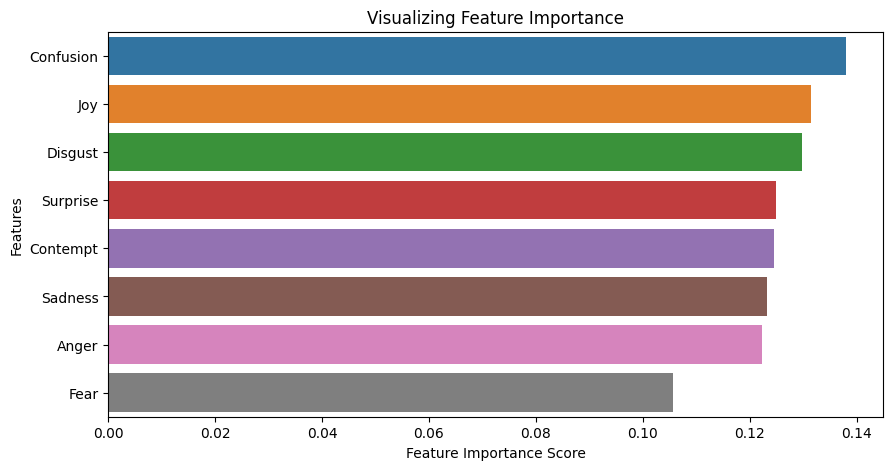

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot the feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.show()


In [4]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_preprocessed, y, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Average cross-validation score: 0.22069906223266447
